In [1]:
# Imports
import getpass
import os
from langchain_openai import ChatOpenAI

from langchain_core.messages import HumanMessage


def init_llm_langsmith(llm_key = 3, temp = 0.5):
    """Initialize the LLM model and LangSmith tracing."""
    # Set environment variables
    def _set_if_undefined(var: str):
        if not os.environ.get(var):
            os.environ[var] = getpass(f"Please provide your {var}")
    _set_if_undefined("OPENAI_API_KEY")
    _set_if_undefined("LANGCHAIN_API_KEY")

    # Add tracing in LangSmith.
    os.environ["LANGCHAIN_TRACING_V2"] = "true"
    if llm_key == 3:
        llm_ver = "gpt-3.5-turbo-0125"
        os.environ["LANGCHAIN_PROJECT"] = "GPT-3.5 Teaching Agent System TEST 1"
    elif llm_key == 4:
        llm_ver = "gpt-4-0125-preview"
        os.environ["LANGCHAIN_PROJECT"] = "GPT-4 Teaching Agent System TEST 1"

    llm_model = ChatOpenAI(model_name=llm_ver, temperature=temp)
    return llm_model

llm_model = init_llm_langsmith(llm_key=3, temp=0.5)

# Main Graph notebook
### This project consists of several sub-systems, ie. sub-graphs, that are all linked together in this notebook.



## Initiate subgraphs, and then collect them in the main graph

In [2]:
from thesis2024.models.coding_agent import CodingMultiAgent
coding_subgraph_class = CodingMultiAgent(llm_model=llm_model)
coding_graph = coding_subgraph_class.instanciate_graph()

/opt/homebrew/Caskroom/miniconda/base/envs/src/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `format_tool_to_openai_function` was deprecated in LangChain 0.1.16 and will be removed in 0.2.0. Use langchain_core.utils.function_calling.convert_to_openai_function() instead.
  warn_deprecated(


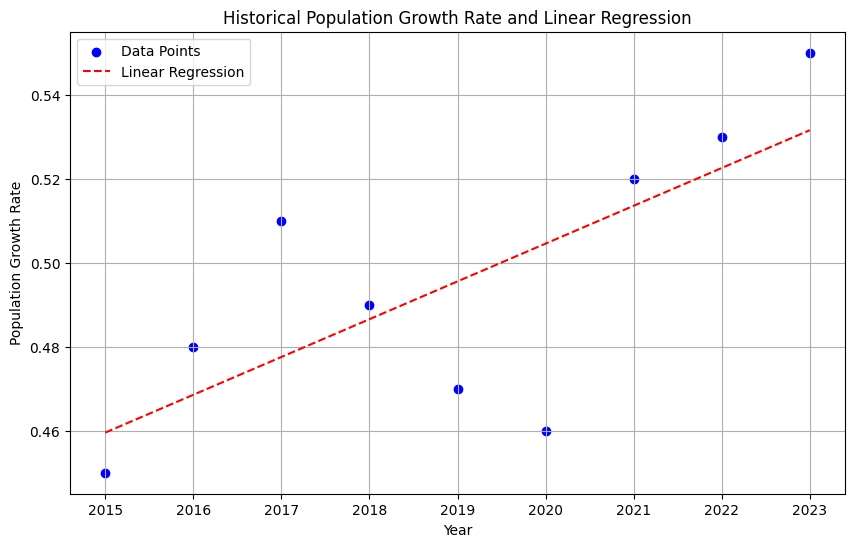

{'messages': [HumanMessage(content='Make a graph showing linear regression. As soon as you have the answer, FINISH'),
  HumanMessage(content='I will need to gather data to perform linear regression and create a graph. Let me do that now.', additional_kwargs={'function_call': {'arguments': '{"query":"population growth data by year"}', 'name': 'tavily_search_results_json'}}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 210, 'total_tokens': 254}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': 'fp_b28b39ffa8', 'finish_reason': 'function_call', 'logprobs': None}, name='Researcher', id='run-47f59f9d-3ecb-4943-9e45-2cece55eec41-0'),
  FunctionMessage(content='tavily_search_results_json response: [{\'url\': \'https://ourworldindata.org/population-growth\', \'content\': \'Max Roser and Hannah Ritchie\\nHannah Ritchie and Edouard Mathieu\\nHannah Ritchie, Edouard Mathieu and Lucas Rodés-Guirao\\nHannah Ritchie and Edouard Mathieu\\nMax Roser and Hannah 

In [9]:
output = coding_graph.invoke({"messages": [HumanMessage(content="Make a graph showing linear regression. As soon as you have the answer, FINISH")],},
                    {"recursion_limit": 100})
output

In [14]:
output["messages"][-10].content

'I have found historical population growth rate data for the United States from the World Bank. The growth rate for the year 2023 is 0.53%. To perform linear regression and create a graph, we would typically need a dataset with multiple data points over time. If you have access to additional historical population growth rate data, we can proceed with the analysis. Let me know if you have more data points or if you would like to explore other options.'

{'Researcher': {'messages': [HumanMessage(content='', additional_kwargs={'function_call': {'arguments': '{"query":"top 5 country populations in the world"}', 'name': 'tavily_search_results_json'}}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 207, 'total_tokens': 232}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': 'fp_b28b39ffa8', 'finish_reason': 'function_call', 'logprobs': None}, name='Researcher', id='run-411b2b13-2804-4bbf-85e7-421b25c412d1-0')], 'sender': 'Researcher'}}
----
{'call_tool': {'messages': [FunctionMessage(content='tavily_search_results_json response: [{\'url\': \'https://www.worldatlas.com/articles/most-populated-countries-in-the-world.html\', \'content\': "2. India - 1,366,417,750. Thousands of Hindu Pilgrims in the holy city of Haridwar in Uttarakhand, India. India is the second most populous country in the world, with over 1.36 billion people. In fact, it is estimated that by 2027, India could overtake China as the world

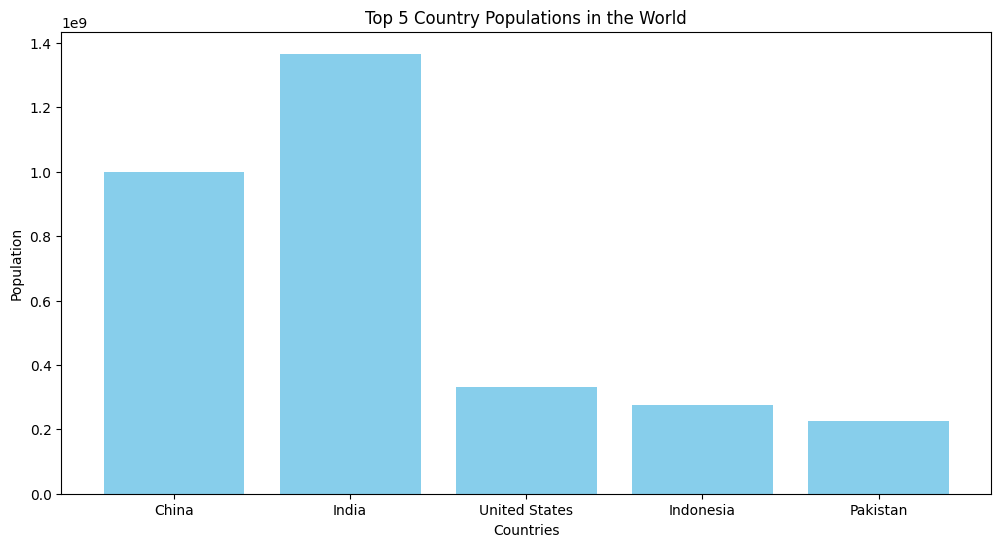

{'Code Generator': {'messages': [HumanMessage(content='', additional_kwargs={'function_call': {'arguments': '{"code":"import matplotlib.pyplot as plt\\n\\n# Data for the top 5 country populations\\ncountries = [\'China\', \'India\', \'United States\', \'Indonesia\', \'Pakistan\']\\npopulations = [1000000000, 1366417750, 331000000, 276000000, 225000000]\\n\\nplt.figure(figsize=(12, 6))\\nplt.bar(countries, populations, color=\'skyblue\')\\nplt.xlabel(\'Countries\')\\nplt.ylabel(\'Population\')\\nplt.title(\'Top 5 Country Populations in the World\')\\nplt.show()"}', 'name': 'python_repl'}}, response_metadata={'token_usage': {'completion_tokens': 141, 'prompt_tokens': 1293, 'total_tokens': 1434}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': 'fp_b28b39ffa8', 'finish_reason': 'function_call', 'logprobs': None}, name='Code Generator', id='run-16c2146b-7d5f-4272-81e2-568cec5d8e97-0')], 'sender': 'Code Generator'}}
----
{'call_tool': {'messages': [FunctionMessage(content="python_r

In [7]:
for s in coding_graph.stream(
{
    "messages": [
        HumanMessage(
            content="Make a graph that shows top 5 country populations in the world."
        )
    ],
},
# Maximum number of steps to take in the graph
{"recursion_limit": 100},
):
    # print(s)
    print(s)
    print("----")

In [7]:


for s in coding_graph.stream(
{
    "messages": [
        HumanMessage(
            content="Illustrate the deep learning subject of Gradient Descent with an interactive example."
        )
    ],
},
# Maximum number of steps to take in the graph
{"recursion_limit": 10},
):
    print(s)
    print("----")

{'Researcher': {'messages': [HumanMessage(content="To illustrate the subject of Gradient Descent with an interactive example, we can create a simple visualization of how Gradient Descent works in the context of optimizing a linear regression model.\n\nGradient Descent is an optimization algorithm used to minimize the cost function in machine learning models by iteratively moving in the direction of the steepest descent of the cost function. It is commonly used in training deep learning models by updating the model parameters in the direction that minimizes the loss function.\n\nHere is an interactive example to demonstrate Gradient Descent:\n\n1. **Setup:**\n   - Let's consider a simple linear regression model with one feature (x) and one weight parameter (w).\n   - The goal is to fit the line y = wx to a set of data points.\n\n2. **Visualization:**\n   - Display a scatter plot of the data points.\n   - Show the initial line (initial guess) on the plot.\n   - Add a slider for the weigh

interactive(children=(FloatSlider(value=0.05, description='learning_rate', max=0.1, min=0.001, step=0.001), In…

{'Code Generator': {'messages': [HumanMessage(content='', additional_kwargs={'function_call': {'arguments': '{"code":"import numpy as np\\nimport matplotlib.pyplot as plt\\nfrom ipywidgets import interact\\n\\n# Generate random data points\\nnp.random.seed(0)\\nx = 2 * np.random.rand(100, 1)\\ny = 4 + 3 * x + np.random.randn(100, 1)\\n\\n# Initial guess for weight parameter w\\nw_init = np.random.randn(1)\\n\\n# Define cost function (Mean Squared Error)\\ndef cost_function(w, x, y):\\n    y_pred = w * x\\n    return np.mean((y_pred - y) ** 2)\\n\\n# Gradient Descent function\\ndef gradient_descent(w_init, x, y, learning_rate, num_iterations):\\n    w = w_init\\n    cost_history = []\\n    for _ in range(num_iterations):\\n        w = w - learning_rate * 2 * np.mean((w * x - y) * x)\\n        cost = cost_function(w, x, y)\\n        cost_history.append(cost)\\n    return w, cost_history\\n\\n# Interactive visualization\\n@interact(learning_rate=(0.001, 0.1, 0.001), num_iterations=(1, 100

GraphRecursionError: Recursion limit of 10 reachedwithout hitting a stop condition. You can increase the limitby setting the `recursion_limit` config key.

In [ ]:
from thesis2024.models.teaching_agent import TeachingMultiAgent
teaching_node = TeachingMultiAgent(llm=llm)

In [ ]:
from thesis2024.models.digital_twin_agent import DigitalTwinAgent
digital_twin_node = DigitalTwinAgent(llm=llm)

In [ ]:
import operator
from typing import Annotated, Sequence, TypedDict
from langchain_core.messages import (AIMessage, BaseMessage, ChatMessage, FunctionMessage, HumanMessage,)
from langgraph.graph import END, StateGraph
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    sender: str


workflow = StateGraph(AgentState)

workflow.add_node("Coder", coding_node)
workflow.add_node("Chart Generator", chart_node)
workflow.add_node("call_tool", tool_node)

workflow.add_conditional_edges(
    "Researcher",
    router,
    {"continue": "Chart Generator", "call_tool": "call_tool", "end": END},
)
workflow.add_conditional_edges(
    "Chart Generator",
    router,
    {"continue": "Researcher", "call_tool": "call_tool", "end": END},
)

workflow.add_conditional_edges(
    "call_tool",
    # Each agent node updates the 'sender' field
    # the tool calling node does not, meaning
    # this edge will route back to the original agent
    # who invoked the tool
    lambda x: x["sender"],
    {
        "Researcher": "Researcher",
        "Chart Generator": "Chart Generator",
    },
)
workflow.set_entry_point("Researcher")
graph = workflow.compile()

## Create Agents

The following helper functions will help create agents. These agents will then be nodes in the graph.

In [28]:


def digital_twin_agent(llm, tools, system_message: str):
    """Create an agent."""
    functions = [format_tool_to_openai_function(t) for t in tools]

    prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                "You are a digital twin assistant."
                " You're job is to read through conversation memory, "
                " and update a summary of what the user knows and does not know. "
                " Other assistants will use this summary best umnderstand what the user needs help for. "
                " You have access to the following tools: {tool_names}.\n{system_message}",
            ),
            MessagesPlaceholder(variable_name="messages"),
        ]
    )
    prompt = prompt.partial(system_message=system_message)
    prompt = prompt.partial(tool_names=", ".join([tool.name for tool in tools]))
    return prompt | llm.bind_functions(functions)


def teaching_minded_agent(llm, tools, system_message: str):
    """Create an agent."""
    functions = [format_tool_to_openai_function(t) for t in tools]

    prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                "You are a helpful assitant with the goal of helping a student learn as much as possible."
                " Your goal is to best determine how to  "
                " You have access to the following tools: {tool_names}.\n{system_message}",
            ),
            MessagesPlaceholder(variable_name="messages"),
        ]
    )
    prompt = prompt.partial(system_message=system_message)
    prompt = prompt.partial(tool_names=", ".join([tool.name for tool in tools]))
    return prompt | llm.bind_functions(functions)

{'Researcher': {'messages': [HumanMessage(content='', additional_kwargs={'function_call': {'arguments': '{"query":"largest 10 mountains in the world"}', 'name': 'tavily_search_results_json'}}, name='Researcher')], 'sender': 'Researcher'}}
----
{'call_tool': {'messages': [FunctionMessage(content='tavily_search_results_json response: [{\'url\': \'https://en.wikipedia.org/wiki/List_of_highest_mountains_on_Earth\', \'content\': "88 | 4\\n87 |\\n86 | 1\\n85 | 8 1\\n84 | 8\\n83 |\\n82 |\\n81 | 8 6 6 2\\n80 | 9 8 5 3 2\\n79 | 5 4 3 3\\n78 | 9 8 7 6 2 2 1 0\\n77 | 9 9 8 8 5 5 4 1 0 0\\n76 |\\n9 7 6 6 4 1 1\\n75 | 7 7 5 5 4 4 4 3 3 1 1\\n74 | 9 9 9 9 7 6 6 6 5 5 3 3 2 2 2 1 1 1 0 0 0\\n73 | 8 8 8 8 8 6 6 5 5 5 4 2 1 1 1 0\\n72 | 9 9 9 8 8 8 8 7 7 6 6 5 4 4 4 3 2 2 1 1 0 0 0 0 0 0 0\\nGallery[edit]\\n1. All peaks 7,000\\xa0m (23,000\\xa0ft) or higher are located in East, Central or South Asia in a rectangle edged by Noshaq (7,492\\xa0m or 24,580\\xa0ft) on the Afghanistan–Pakistan border in the 

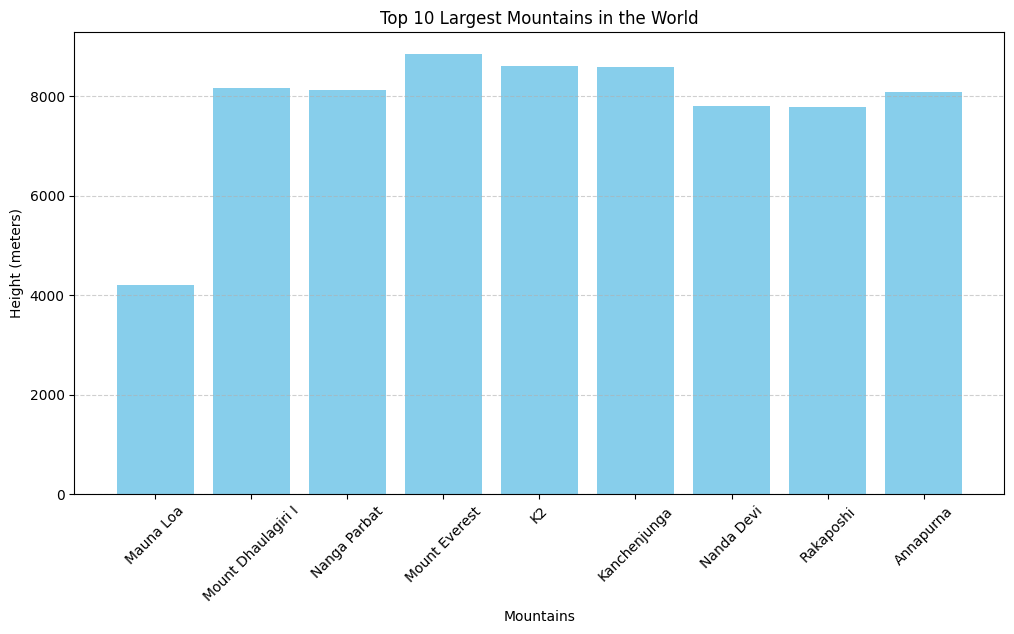

{'Chart Generator': {'messages': [HumanMessage(content="To visualize the heights of the largest 10 mountains in the world, I can create a bar graph showing the heights of these mountains. Let's create the graph with the available data.", additional_kwargs={'function_call': {'arguments': '{"code":"import matplotlib.pyplot as plt\\n\\n# Mountain data\\nmountains = [\'Mauna Loa\', \'Mount Dhaulagiri I\', \'Nanga Parbat\', \'Mount Everest\', \'K2\', \'Kanchenjunga\', \'Nanda Devi\', \'Rakaposhi\', \'Annapurna\']\\nheights = [4209, 8167, 8126, 8848, 8611, 8586, 7816, 7788, 8091]\\n\\n# Create a bar graph\\nplt.figure(figsize=(12, 6))\\nplt.bar(mountains, heights, color=\'skyblue\')\\nplt.xlabel(\'Mountains\')\\nplt.ylabel(\'Height (meters)\')\\nplt.title(\'Top 10 Largest Mountains in the World\')\\nplt.xticks(rotation=45)\\nplt.grid(axis=\'y\', linestyle=\'--\', alpha=0.6)\\n\\nplt.show()"}', 'name': 'python_repl'}}, name='Chart Generator')], 'sender': 'Chart Generator'}}
----
{'call_tool':

In [35]:
for s in graph.stream(
    {
        "messages": [
            HumanMessage(
                content="Make a graph over the largest 10 mountains in the world."
            )
        ],
    },
    # Maximum number of steps to take in the graph
    {"recursion_limit": 100},
):
    print(s)
    print("----")